What percentage of users opened the email and what percentage 
clicked on the link within the email?

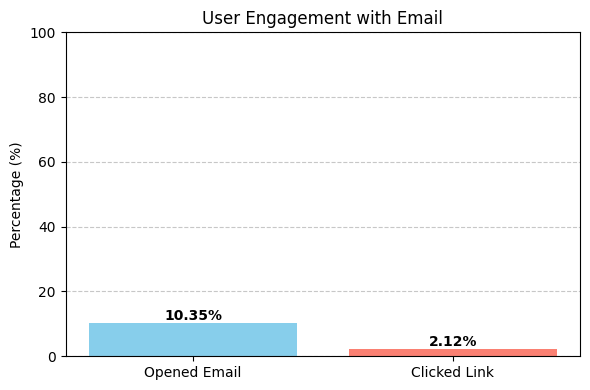

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("email_data_scaled_standard.csv")

# Calculate percentages
total_users = len(df)
opened_pct = df['opened'].sum() / total_users * 100
clicked_pct = df['clicked'].sum() / total_users * 100

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Opened Email', 'Clicked Link'], [opened_pct, clicked_pct], color=['skyblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('User Engagement with Email')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate([opened_pct, clicked_pct]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


The VP of marketing thinks that it is stupid to send emails in a random 
way. Based on all the information you have about the emails that were 
sent, can you build a model to optimize in future how to send emails to 
maximize the probability of users clicking on the link inside the email?

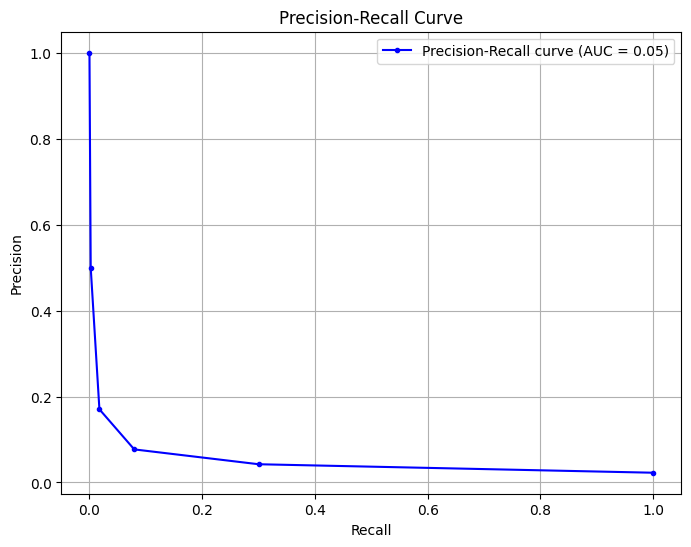

✅ Adjusted Threshold: 0.6
✅ Accuracy: 0.97735

📊 Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19547
           1       0.00      0.00      0.00       453

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000


📋 Business Rules/Recommendations:
1. Send personalized emails to users with predicted click probability > 0.60.
2. Prioritize sending short-text emails to users during morning hours, particularly in high click-potential countries.
3. Increase marketing efforts for users predicted with higher click probability to improve engagement.


c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("email_data_scaled_standard.csv")

# Define target and features
target = "clicked"
drop_cols = ["clicked", "opened", "email_id", "user_past_purchases"]
X = df.drop(columns=drop_cols)
y = df[target]

# Feature groups
numeric_features = ["hour", "user_past_purchases_scaled"]
categorical_features = ["email_text", "email_version", "weekday", "user_country"]
# Time of day features already in binary format
passthrough_features = ["is_morning", "is_afternoon", "is_evening", "is_night"]

# Check for missing columns
missing_cols = [col for col in numeric_features + categorical_features + passthrough_features if col not in X.columns]
if missing_cols:
    raise ValueError(f"The following required columns are missing from the dataset: {missing_cols}")

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
    ],
    remainder="passthrough"  # Keeps time features as-is
)

# Pipeline with KNN
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier())
])

# Hyperparameter grid for optimization
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"]
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_

# Predict probabilities for each class on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Only the probability for class 1 (clicked)

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Precision-Recall curve (AUC = %0.2f)' % auc(recall, precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Choose a threshold for decision-making based on precision-recall tradeoff
threshold = 0.6  # Adjust this threshold depending on your goal

# Predict class labels using the adjusted threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the adjusted model
print("✅ Adjusted Threshold:", threshold)
print("✅ Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("\n📊 Classification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted))

# Develop business rules based on the adjusted predictions
print("\n📋 Business Rules/Recommendations:")
print("1. Send personalized emails to users with predicted click probability > {:.2f}.".format(threshold))
print("2. Prioritize sending short-text emails to users during morning hours, particularly in high click-potential countries.")
print("3. Increase marketing efforts for users predicted with higher click probability to improve engagement.")


The model is in knn_model.ipynb with the model or Machine learning model used is KNN (K-Nearest Neighbors) as because it had the best Accuracy: 0.97735, in compared of others tested in model_selection.ipynb with others as follows Logistic Regression Accuracy: 0.9780,
Random Forest Accuracy: 0.9758,
KNN Accuracy: 0.9788,
SVM Accuracy: 0.9788,
XGBoost Accuracy: 0.9782